In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#load data to csv
df=pd.read_csv('digit_recognizer_dataset.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
#there are no missing values in the dataset 
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [5]:
#we can see some summary values for each pixel
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
#list with the unique values of the label attribute sorted
list(np.sort(df['label'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [7]:
df.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

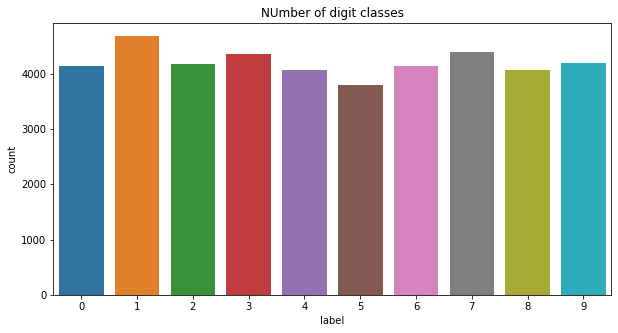

In [8]:
#we have balanced values as we can see
plt.figure(figsize=(10,5))
plt.title('NUmber of digit classes')
sns.countplot(df.label);

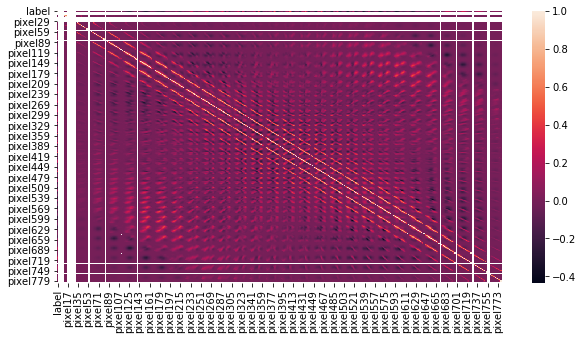

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr())

we can see that we have not too much correlation

In [10]:
#label of 10th digit from data
df.iloc[10,0]

8

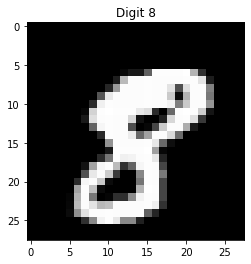

In [11]:
#plot a digit from data
n=10 #digit in 10th place
digit = df.iloc[n, 1:]
digit = digit.values.reshape(28,28)
plt.figure(figsize=(8,4))
plt.imshow(digit, cmap='gray')
plt.title('Digit '+str(df.iloc[n,0]));

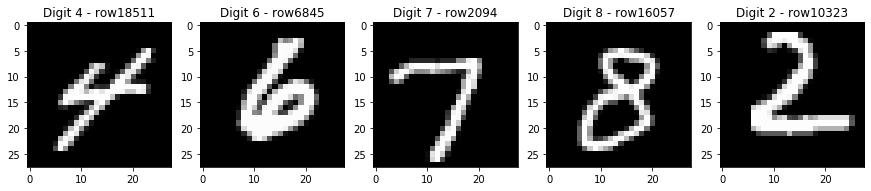

In [12]:
# plot some random digits from data
import random
n=[random.choice(df.index) for i in range(5)] # 5 random digits
count=1 #counter for each plot 
plt.figure(figsize=(15,5))

for i in n:
    digit = df.iloc[i, 1:]
    digit = digit.values.reshape(28,28) #reshape for image to 28X28
    plt.subplot(1,len(n),count)  #plot in a row
    plt.imshow(digit, cmap='gray')
    plt.title('Digit '+str(df.iloc[i,0])+' - row'+str(i)); #title of each image
    count+=1

### split dataset

In [13]:
# y= label class and X= values
X,y=df.drop('label',axis=1),df.label

### Scale data

In [14]:
#Scale data for some algorithms, because of distances
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scal = scaler.fit_transform(X)

### Create Functions

#### KFold

In [15]:
#StratifiedKFold
#each set contains approximately the same percentage of samples of each target class as the complete set.
#we will use it for evaluation, so we create a function
from sklearn.model_selection import StratifiedKFold, cross_val_score
scv = StratifiedKFold(n_splits=10, shuffle=True, random_state=92)

# Evaluate a given model using cross-validation
def evaluate_cv(model, X, y):
    score = cross_val_score(model, X, y, scoring='accuracy', cv=scv)
    return score

#### test-split

In [16]:
#create test set and train set
from sklearn.model_selection import train_test_split
def split(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=92)
    return X_train, X_test, y_train, y_test

#### measures

In [17]:
#function with 3 measures
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
def scores(model,X_test,y_test):
    predicted = model.predict(X_test)
    #print precision
    precision= precision_score(y_test, predicted, average='macro')
    print(f'Precision score: {precision:0.2f}')
    #print recall
    recall = recall_score(y_test, predicted, average='macro')
    print(f'Recall score: {recall:0.2f}')
    #print f1 score
    f1 = f1_score(y_test, predicted, average='macro')
    print(f'F1 score: {f1:0.2f}\n\n')

#### performance

In [18]:
#the most important function we create for fit, predict and print confusion matrix with heatmap
#also, we print accuracy for each algorithm
import time
def perform(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    #fit model
    model.fit(X_train,y_train)
    #Model Training Accuracy
    print(f'\nTraining Accuracy: {model.score(X_train, y_train):.3f}\n')
    #Model Test Accuracy
    print(f'Test Accuracy: {model.score(X_test, y_test):.3f}\n\n')
    #predictions
    preds = model.predict(X_test)
    #classification report
    print(classification_report(y_test,preds))
    #confusion matrix on heatmap
    matrix = confusion_matrix(y_test,preds)
    plt.figure(figsize=(10,7))
    sns.heatmap(matrix, annot=True, fmt='.5g', cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    title = f'Confusion Matrix with Accuracy Score: {model.score(X_test, y_test):.3f}'
    plt.title(title, size = 17);
    #print time that run
    print('\n--- %s seconds ---\n' % (time.time() - start_time))

### Dimensionality Reduction

In [19]:
from sklearn.decomposition import PCA

In [20]:
#create 2 components from 784 attributes
pca = PCA(2)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(42000, 2)

In [21]:
#percentage of variance that it holds
pca.explained_variance_ratio_.cumsum()[-1]

0.1690920395805373

it is not a good choice, beacuse it is more than 80% which we leave out

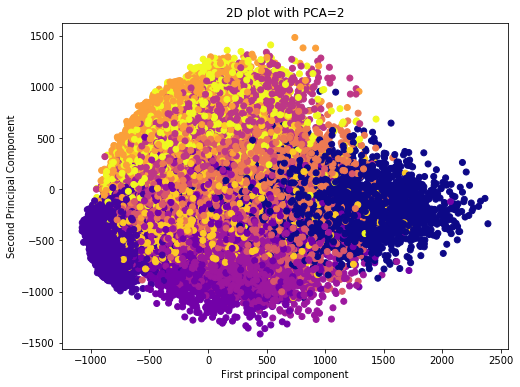

In [22]:
#but we plot the values to see them in space
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('2D plot with PCA=2');

In [23]:
#create 3 components from 784 attributes
pca = PCA(3)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(42000, 3)

In [24]:
#percentage of variance that it holds
pca.explained_variance_ratio_.cumsum()[-1]

0.23055107305662442

it is not a good choice, beacuse it is more than 75% which we leave out

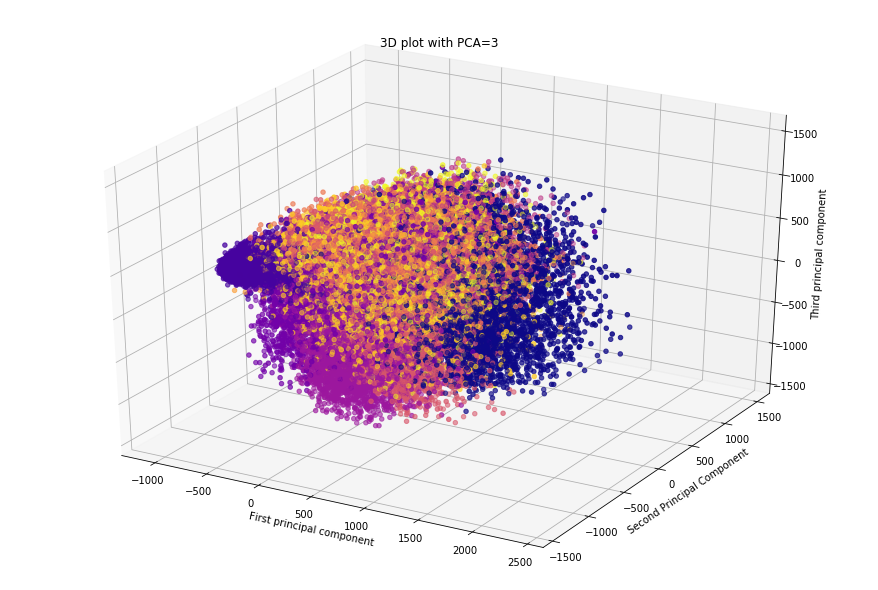

In [25]:
#but we plot the values to see them in space
from mpl_toolkits.mplot3d import Axes3D

ax=Axes3D(plt.figure(figsize=(12,8)))
ax.scatter(X_reduced[:,0],X_reduced[:,1],X_reduced[:,2],c=y,cmap='plasma')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third principal component')
plt.title('3D plot with PCA=3');

In [26]:
#create 95% of variance from 784 attributes
pca = PCA(0.95)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(42000, 154)

it holds 154 attributes

In [27]:
pca.explained_variance_ratio_.cumsum()[-1]

0.9504332382633768

In [28]:
#recover data
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape

(42000, 784)

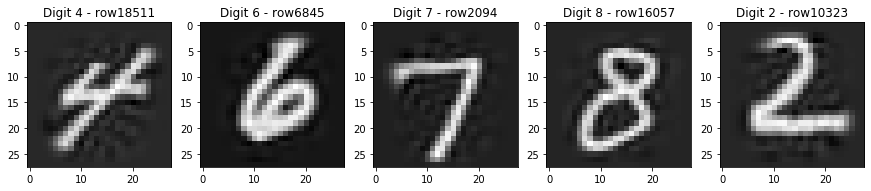

In [29]:
# plot some random digits from data
# 5 random digits
rec=pd.DataFrame(X_recovered)
count=1
plt.figure(figsize=(15,5))

for i in n:
    digit = rec.iloc[i]
    digit = digit.values.reshape(28,28)
    plt.subplot(1,len(n),count)
    plt.imshow(digit, cmap='gray')
    plt.title('Digit '+str(y[i])+' - row'+str(i));
    count+=1

very close with the digits that we plot before

FIRST, WE WILL RUN THE ALGORITHMS WITHOUT PCA AND THEN WITH PCA, THAT IS X_reduced

## Decision Tree

In [30]:
#call split method
X_train, X_test, y_train, y_test=split(X,y)

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()

#grid search to find best choices
tree = DecisionTreeClassifier()
grid_param = {'criterion':['gini', 'entropy'], 'max_depth':range(2,15)}
gd_sr = GridSearchCV(tree,grid_param,scoring='accuracy',cv=5)

gd_sr.fit(X_train, y_train)
print('Best choice: ', gd_sr.best_params_)
print(f'Score: {gd_sr.best_score_:.3f}')
#print the time that run
print('--- %s seconds ---' % (time.time() - start_time))

Best choice:  {'criterion': 'entropy', 'max_depth': 14}
Score: 0.855
--- 357.7427670955658 seconds ---



Training Accuracy: 0.996

Test Accuracy: 0.857


              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1250
           1       0.92      0.95      0.93      1390
           2       0.84      0.82      0.83      1213
           3       0.82      0.81      0.81      1320
           4       0.85      0.85      0.85      1187
           5       0.79      0.80      0.79      1144
           6       0.89      0.87      0.88      1252
           7       0.88      0.89      0.88      1300
           8       0.82      0.81      0.82      1213
           9       0.82      0.84      0.83      1331

    accuracy                           0.86     12600
   macro avg       0.86      0.86      0.86     12600
weighted avg       0.86      0.86      0.86     12600


--- 6.667018890380859 seconds ---



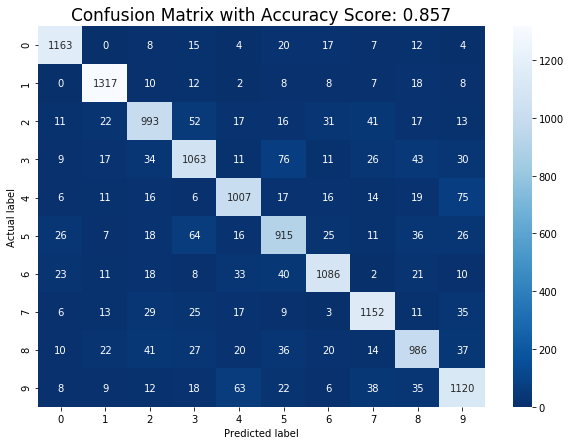

In [32]:
#desicion tree classifier
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=14)
perform(dtree,X_train, X_test, y_train, y_test)

Too Fast algorithm, but too low test accuracy

accuracy=0.857, time=6.667

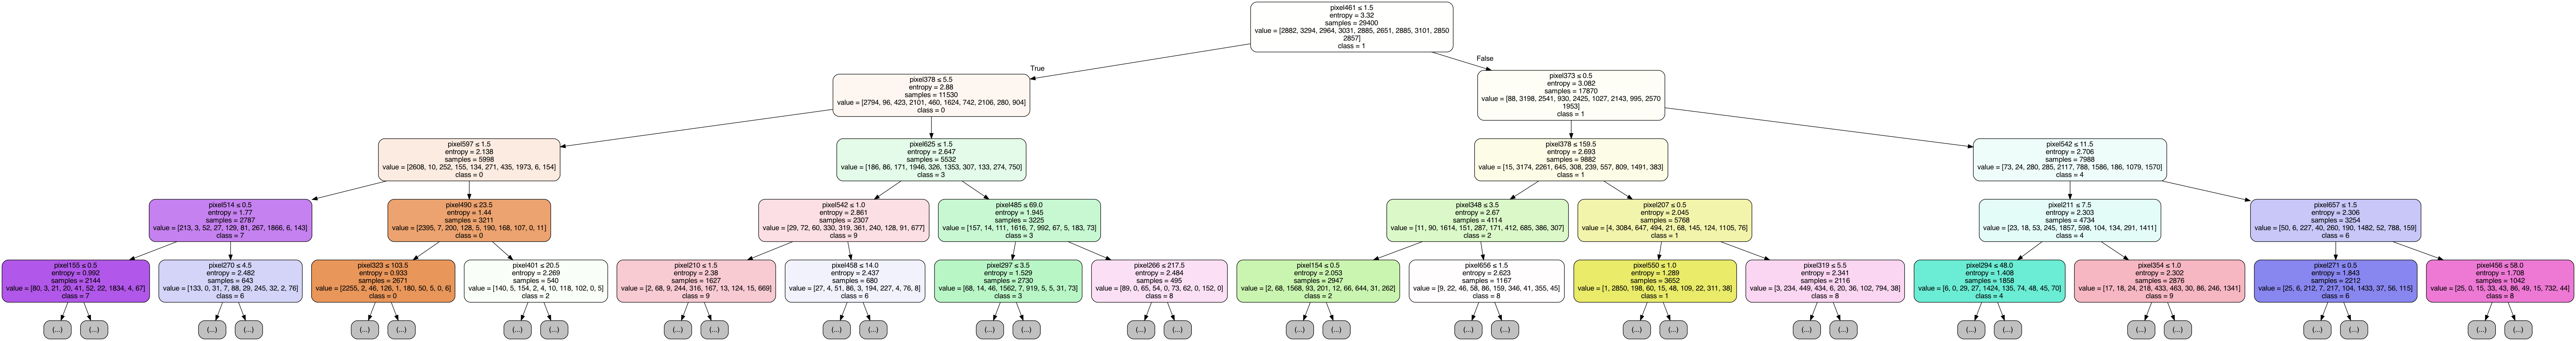

In [33]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus 

#create a list with unique digits
lista = [str(x) for x in range(10)]

#Visualization of tree
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data, max_depth=4, feature_names=X.columns, class_names=lista,
                filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

we visualize a part of tree, depth=4

## Logistic Regression

In [34]:
#we use the scaled data for some algorithms, like logistic regression, knn, svm, naive bayes
#because of distances to standardize them
X_train, X_test, y_train, y_test=split(X_scal,y)


Training Accuracy: 0.961

Test Accuracy: 0.900


              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1250
           1       0.94      0.96      0.95      1390
           2       0.88      0.86      0.87      1213
           3       0.89      0.87      0.88      1320
           4       0.90      0.91      0.90      1187
           5       0.86      0.84      0.85      1144
           6       0.92      0.94      0.93      1252
           7       0.90      0.93      0.92      1300
           8       0.86      0.84      0.85      1213
           9       0.89      0.87      0.88      1331

    accuracy                           0.90     12600
   macro avg       0.90      0.90      0.90     12600
weighted avg       0.90      0.90      0.90     12600


--- 13.129122734069824 seconds ---



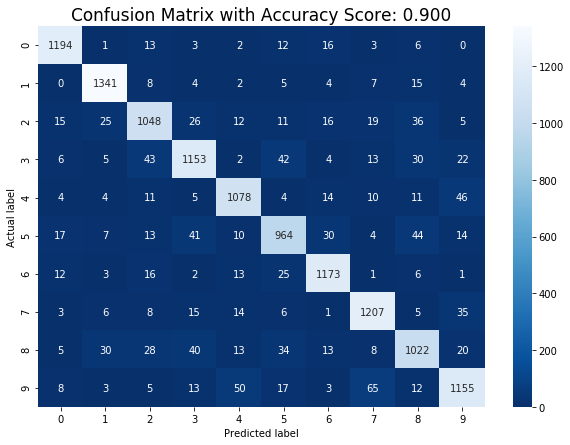

In [35]:
from sklearn.linear_model import LogisticRegression

#lbfgs For multiclass problems ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
log = LogisticRegression(solver='lbfgs')
perform(log,X_train, X_test, y_train, y_test)

Fast algorithm again but low accuracy for MNIST dataset

accuracy=0.900, time=13.129

## KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
error_rate = []
K=[1,3,5,7,9,11,13,15,17,19,21]
# create for some K values a classifier to find the best value of them
#we will find the lowest error and the best k value
for i in K:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
print('--- %s seconds ---' % (time.time() - start_time))

--- 5073.984086990356 seconds ---


Text(0, 0.5, 'Error Rate')

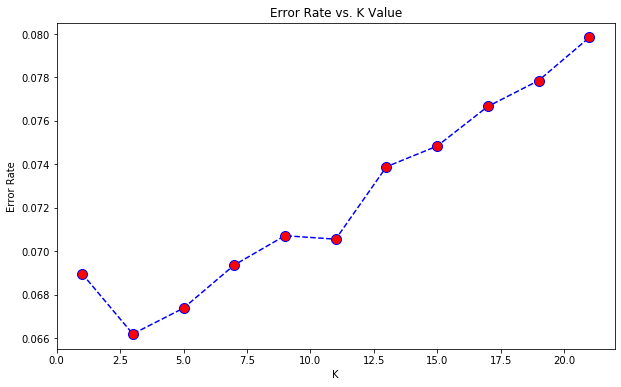

In [69]:
#plot the error of each k
plt.figure(figsize=(10,6))
plt.plot(K,error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

we can see that the lowest error we got is 0.066 at K=3.
So we choose k=3


Training Accuracy: 0.966

Test Accuracy: 0.934


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1250
           1       0.94      0.99      0.96      1390
           2       0.94      0.92      0.93      1213
           3       0.91      0.93      0.92      1320
           4       0.94      0.92      0.93      1187
           5       0.93      0.90      0.91      1144
           6       0.95      0.97      0.96      1252
           7       0.93      0.92      0.92      1300
           8       0.96      0.88      0.92      1213
           9       0.90      0.90      0.90      1331

    accuracy                           0.93     12600
   macro avg       0.93      0.93      0.93     12600
weighted avg       0.93      0.93      0.93     12600


--- 2517.4612600803375 seconds ---



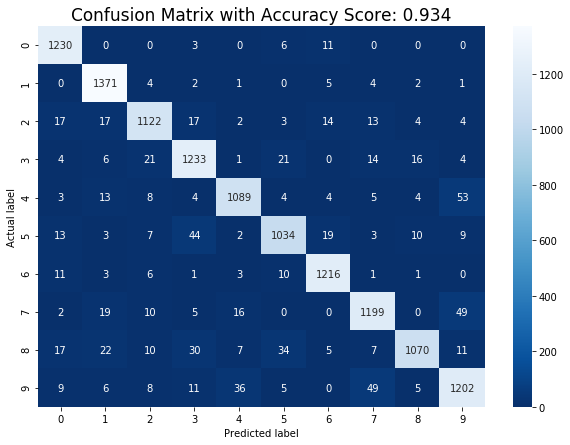

In [77]:
knn = KNeighborsClassifier(n_neighbors=3)
perform(knn,X_train, X_test, y_train, y_test)

Knn is too slow algorithm and the accuracy is not so good, but it is ok

accuracy=0.934, time=2517.461

## Support Vector Machines

In [36]:
from sklearn.svm import SVC


Training Accuracy: 0.998

Test Accuracy: 0.910


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1250
           1       0.95      0.98      0.96      1390
           2       0.88      0.92      0.90      1213
           3       0.87      0.89      0.88      1320
           4       0.89      0.93      0.91      1187
           5       0.88      0.86      0.87      1144
           6       0.95      0.94      0.94      1252
           7       0.92      0.93      0.92      1300
           8       0.90      0.83      0.87      1213
           9       0.92      0.85      0.88      1331

    accuracy                           0.91     12600
   macro avg       0.91      0.91      0.91     12600
weighted avg       0.91      0.91      0.91     12600


--- 487.98966789245605 seconds ---



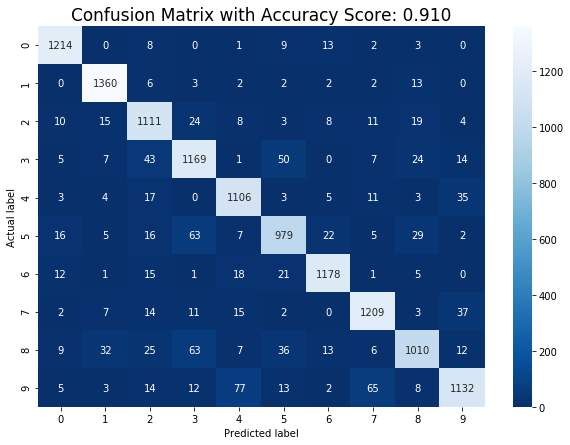

In [65]:
svc=SVC(C=10,kernel='linear',gamma='auto')
perform(svc,X_train, X_test, y_train, y_test)

We run the algorithm with 3 different values of C [10, 100, 1000], and all have the same results, but with C=10 was the fastest. So we hold this one.


Training Accuracy: 1.000

Test Accuracy: 0.964


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1250
           1       0.99      0.98      0.98      1390
           2       0.94      0.97      0.96      1213
           3       0.97      0.95      0.96      1320
           4       0.96      0.96      0.96      1187
           5       0.97      0.95      0.96      1144
           6       0.97      0.98      0.97      1252
           7       0.93      0.97      0.95      1300
           8       0.97      0.96      0.96      1213
           9       0.96      0.93      0.95      1331

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600


--- 753.3069350719452 seconds ---



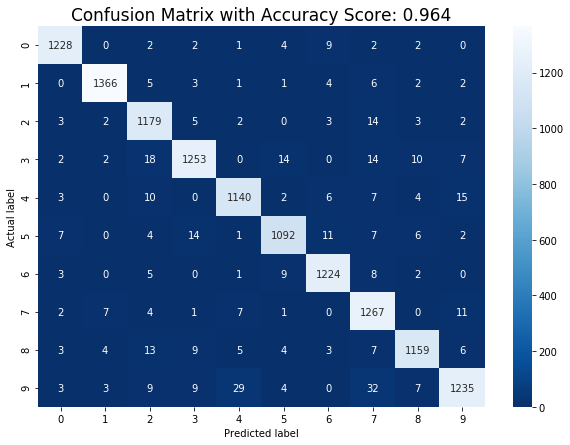

In [56]:
svc=SVC(C=10,kernel='rbf',gamma='auto')
perform(svc,X_train, X_test, y_train, y_test)

We run the algorithm with 3 different values of C [10, 100, 1000], and all have the same results, but with C=10 was the fastest. So we hold this one.

Also, as we can see kernel='rbf' is better. So, we prefer it. But it is 4 minutes later.

accuracy=0.96, time=753.307

## Naive Bayes


Training Accuracy: 0.519

Test Accuracy: 0.522


              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1250
           1       0.74      0.95      0.83      1390
           2       0.84      0.18      0.30      1213
           3       0.64      0.34      0.44      1320
           4       0.78      0.12      0.21      1187
           5       0.57      0.05      0.09      1144
           6       0.61      0.93      0.74      1252
           7       0.88      0.26      0.40      1300
           8       0.24      0.54      0.33      1213
           9       0.38      0.93      0.53      1331

    accuracy                           0.52     12600
   macro avg       0.65      0.51      0.47     12600
weighted avg       0.65      0.52      0.48     12600


--- 5.351719856262207 seconds ---



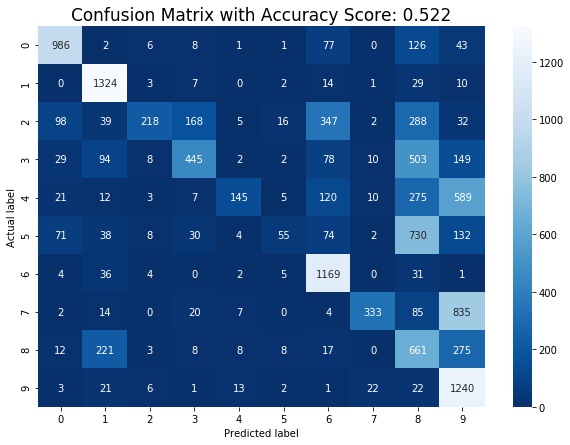

In [38]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
perform(gnb,X_train, X_test, y_train, y_test)

too fast but very low accuracy

accuracy=0.522, time=5.352

## Ensembles

#### RandomForest 

In [78]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, max_features=5)
print(evaluate_cv(model, X, y).mean())

0.9632619047619049



Training Accuracy: 1.000

Test Accuracy: 0.960


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1250
           1       0.98      0.98      0.98      1390
           2       0.96      0.96      0.96      1213
           3       0.95      0.92      0.94      1320
           4       0.97      0.97      0.97      1187
           5       0.97      0.95      0.96      1144
           6       0.97      0.98      0.98      1252
           7       0.96      0.96      0.96      1300
           8       0.94      0.94      0.94      1213
           9       0.94      0.95      0.95      1331

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600


--- 91.5378999710083 seconds ---



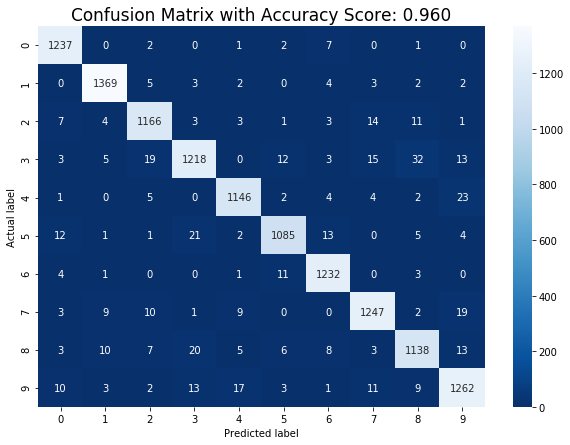

In [79]:
perform(model,X_train, X_test, y_train, y_test)

Very good accuracy and too fast

accuracy=0.96, time=91.538

#### AdaBoost 

In [42]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=500, random_state=92)
print(evaluate_cv(model, X, y).mean())

0.6641904761904762



Training Accuracy: 0.709

Test Accuracy: 0.695


              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1250
           1       0.80      0.96      0.87      1390
           2       0.67      0.35      0.46      1213
           3       0.77      0.54      0.63      1320
           4       0.76      0.71      0.74      1187
           5       0.71      0.65      0.68      1144
           6       0.48      0.95      0.64      1252
           7       0.85      0.69      0.76      1300
           8       0.73      0.61      0.66      1213
           9       0.64      0.68      0.66      1331

    accuracy                           0.70     12600
   macro avg       0.72      0.69      0.69     12600
weighted avg       0.72      0.70      0.69     12600


--- 417.64556193351746 seconds ---



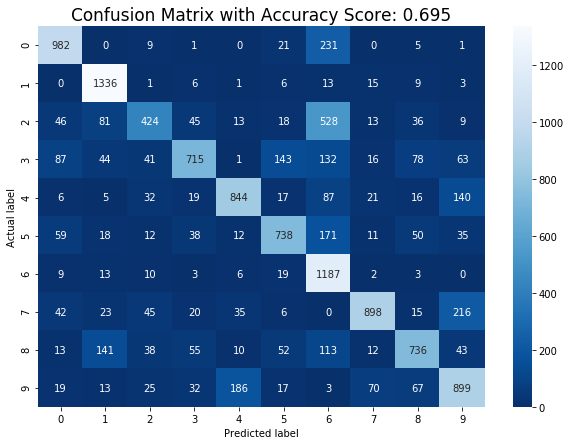

In [81]:
perform(model,X_train, X_test, y_train, y_test)

too slow and too bad accuracy

accuracy=0.695, time=417.645

#### XGboost


Training Accuracy: 1.000

Test Accuracy: 0.969


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1250
           1       0.98      0.98      0.98      1390
           2       0.97      0.97      0.97      1213
           3       0.98      0.95      0.96      1320
           4       0.96      0.97      0.97      1187
           5       0.96      0.96      0.96      1144
           6       0.98      0.98      0.98      1252
           7       0.97      0.97      0.97      1300
           8       0.96      0.96      0.96      1213
           9       0.96      0.95      0.96      1331

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600


--- 508.1680612564087 seconds ---



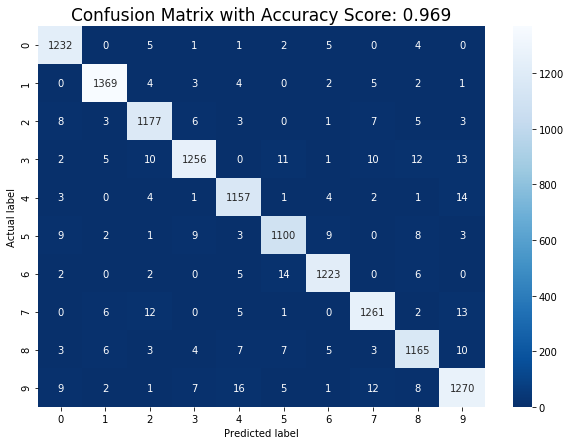

In [44]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='error')
perform(model,X_train, X_test, y_train, y_test)

As we can see a good score, maybe the best one with 0.969 and a running time not bad to 8.5 minutes

accuracy=0.969, time=508.168

## ALL WITH PCA

In [84]:
#we rescale data for some algorithm
#We have a problem with SVM with X_reduced with test accuracy=0.110 and train accuracy=1.0
X_scal = scaler.fit_transform(X_reduced)

#Now we will run the same algorithms with reduced scale data from PCA
X_train, X_test, y_train, y_test=split(X_scal,y)

In [85]:
#gridsearch for the decision tree
gd_sr.fit(X_train, y_train)
print('Best choice: ', gd_sr.best_params_)
print(f'Score: {gd_sr.best_score_:.3f}')

Best choice:  {'criterion': 'entropy', 'max_depth': 14}
Score: 0.814


In [86]:
#we create a list with the models that we use before
models = []
models.append(('DT',  DecisionTreeClassifier(criterion='entropy',max_depth=14)))
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('kNN', KNeighborsClassifier(n_neighbors=3)))
models.append(('SVM',  SVC(C=10,kernel='rbf',gamma='auto')))
models.append(('NB',  GaussianNB()))
models.append(('RF',  RandomForestClassifier(n_estimators=200, max_features=5)))
models.append(('AdB',  AdaBoostClassifier(n_estimators=200, random_state=92)))
models.append(('XGB',  XGBClassifier(use_label_encoder=False, eval_metric='error')))

In [87]:
#we call the function evaluate_cv for cross validation in each model
for name, model in models:
    result=evaluate_cv(model, X_scal, y)
    print("%03s: %f (+/- %f)" % (name, result.mean(), result.std()))

 DT: 0.827595 (+/- 0.006670)
 LR: 0.919571 (+/- 0.004847)
kNN: 0.897595 (+/- 0.002913)
SVM: 0.974286 (+/- 0.001917)
 NB: 0.856929 (+/- 0.004590)
 RF: 0.939595 (+/- 0.003971)
AdB: 0.708952 (+/- 0.015140)
XGB: 0.959429 (+/- 0.002771)


As we can see, the most algorithms have better accuracy score

DT

Training Accuracy: 0.987

Test Accuracy: 0.817


              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1250
           1       0.93      0.95      0.94      1390
           2       0.82      0.80      0.81      1213
           3       0.78      0.74      0.76      1320
           4       0.79      0.78      0.78      1187
           5       0.75      0.73      0.74      1144
           6       0.87      0.88      0.87      1252
           7       0.83      0.87      0.85      1300
           8       0.74      0.75      0.74      1213
           9       0.76      0.75      0.75      1331

    accuracy                           0.82     12600
   macro avg       0.81      0.82      0.81     12600
weighted avg       0.82      0.82      0.82     12600


--- 12.608270168304443 seconds ---

Precision score: 0.81
Recall score: 0.82
F1 score: 0.81


LR

Training Accuracy: 0.934

Test Accuracy: 0.915


              precision    recall  f1-sc

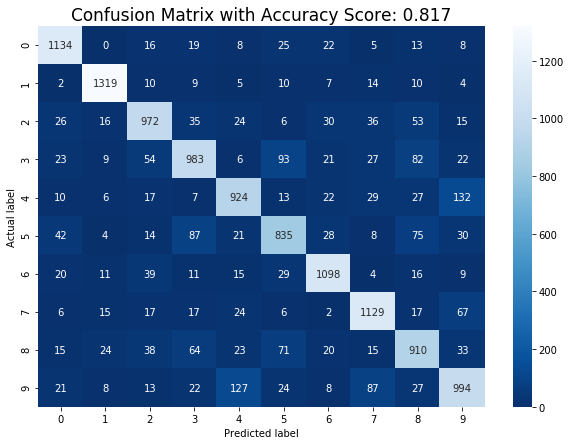

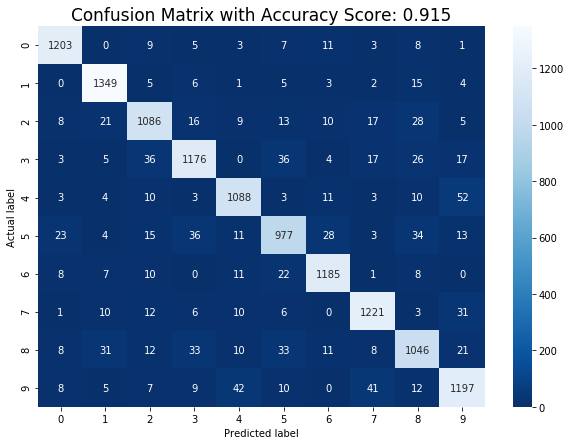

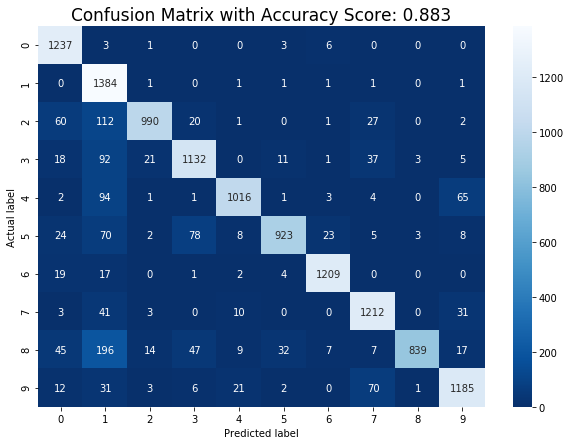

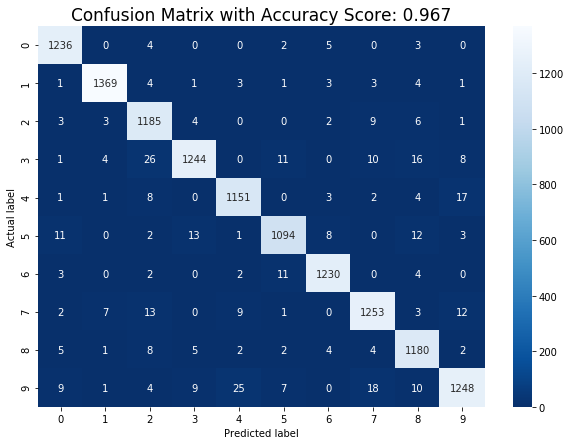

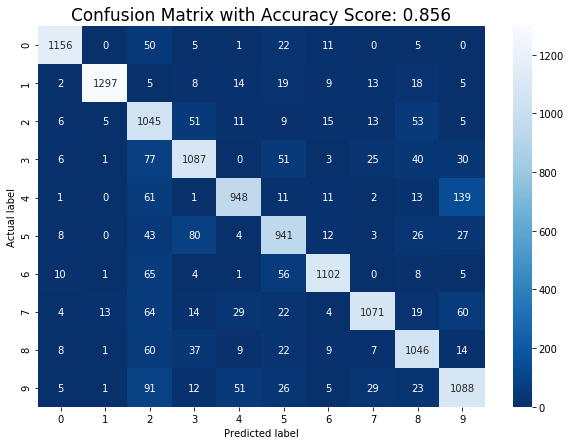

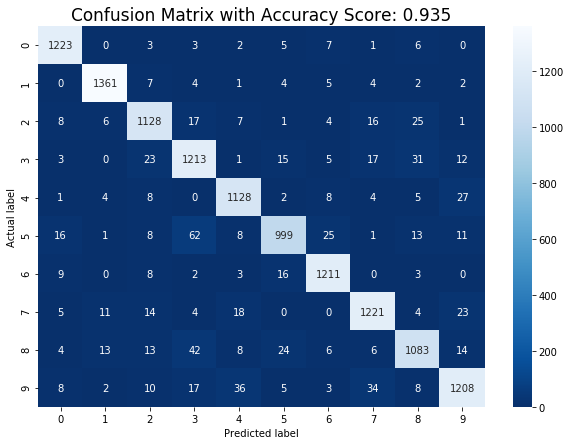

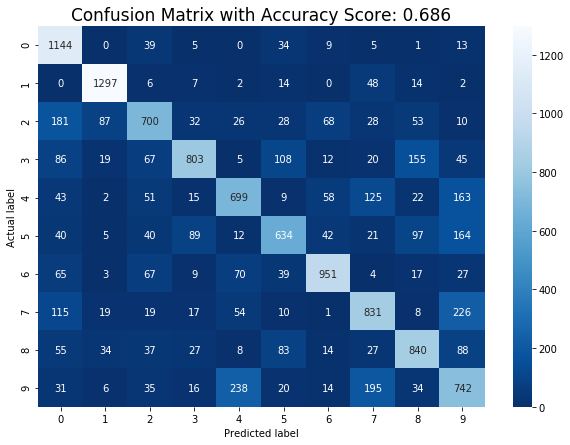

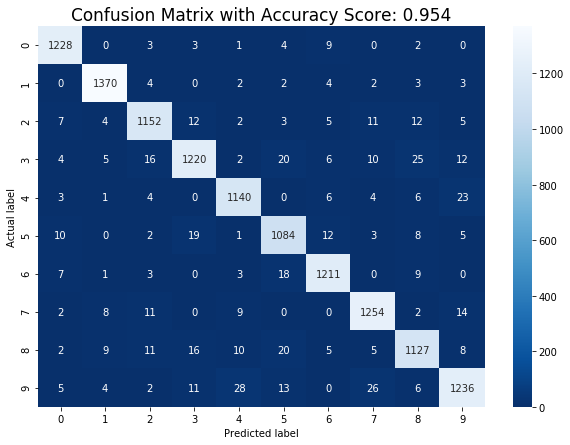

In [88]:
#performance and measures with PCA
for name, model in models:
    print(name)
    perform(model,X_train, X_test, y_train, y_test)
    scores(model,X_test, y_test)

most of algorithms are faster, after dimensonality reduction

# export images that we have, per instance

import numpy as np
import csv
from PIL import Image    
import matplotlib.pyplot as plt

counter = dict()

with open('digit_recognizer_dataset.csv') as csv_file:
    csv_reader = csv.reader(csv_file)

    # skip headers
    next(csv_reader)

    for row in csv_reader:

        pixels = row[:-1] # without label
        pixels = np.array(pixels, dtype='float')
        pixels = pixels.reshape((28, 28))

        label = row[-1]

        if label not in counter:
            counter[label] = 0
        counter[label] += 1

        filename = '{}{}.png'.format(label, counter[label])
        plt.imsave(filename, pixels)

        print('saved:', filename)